# Bar Charts:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from itertools import permutations

import warnings
warnings.filterwarnings("ignore")

## Comparing KL Divergences

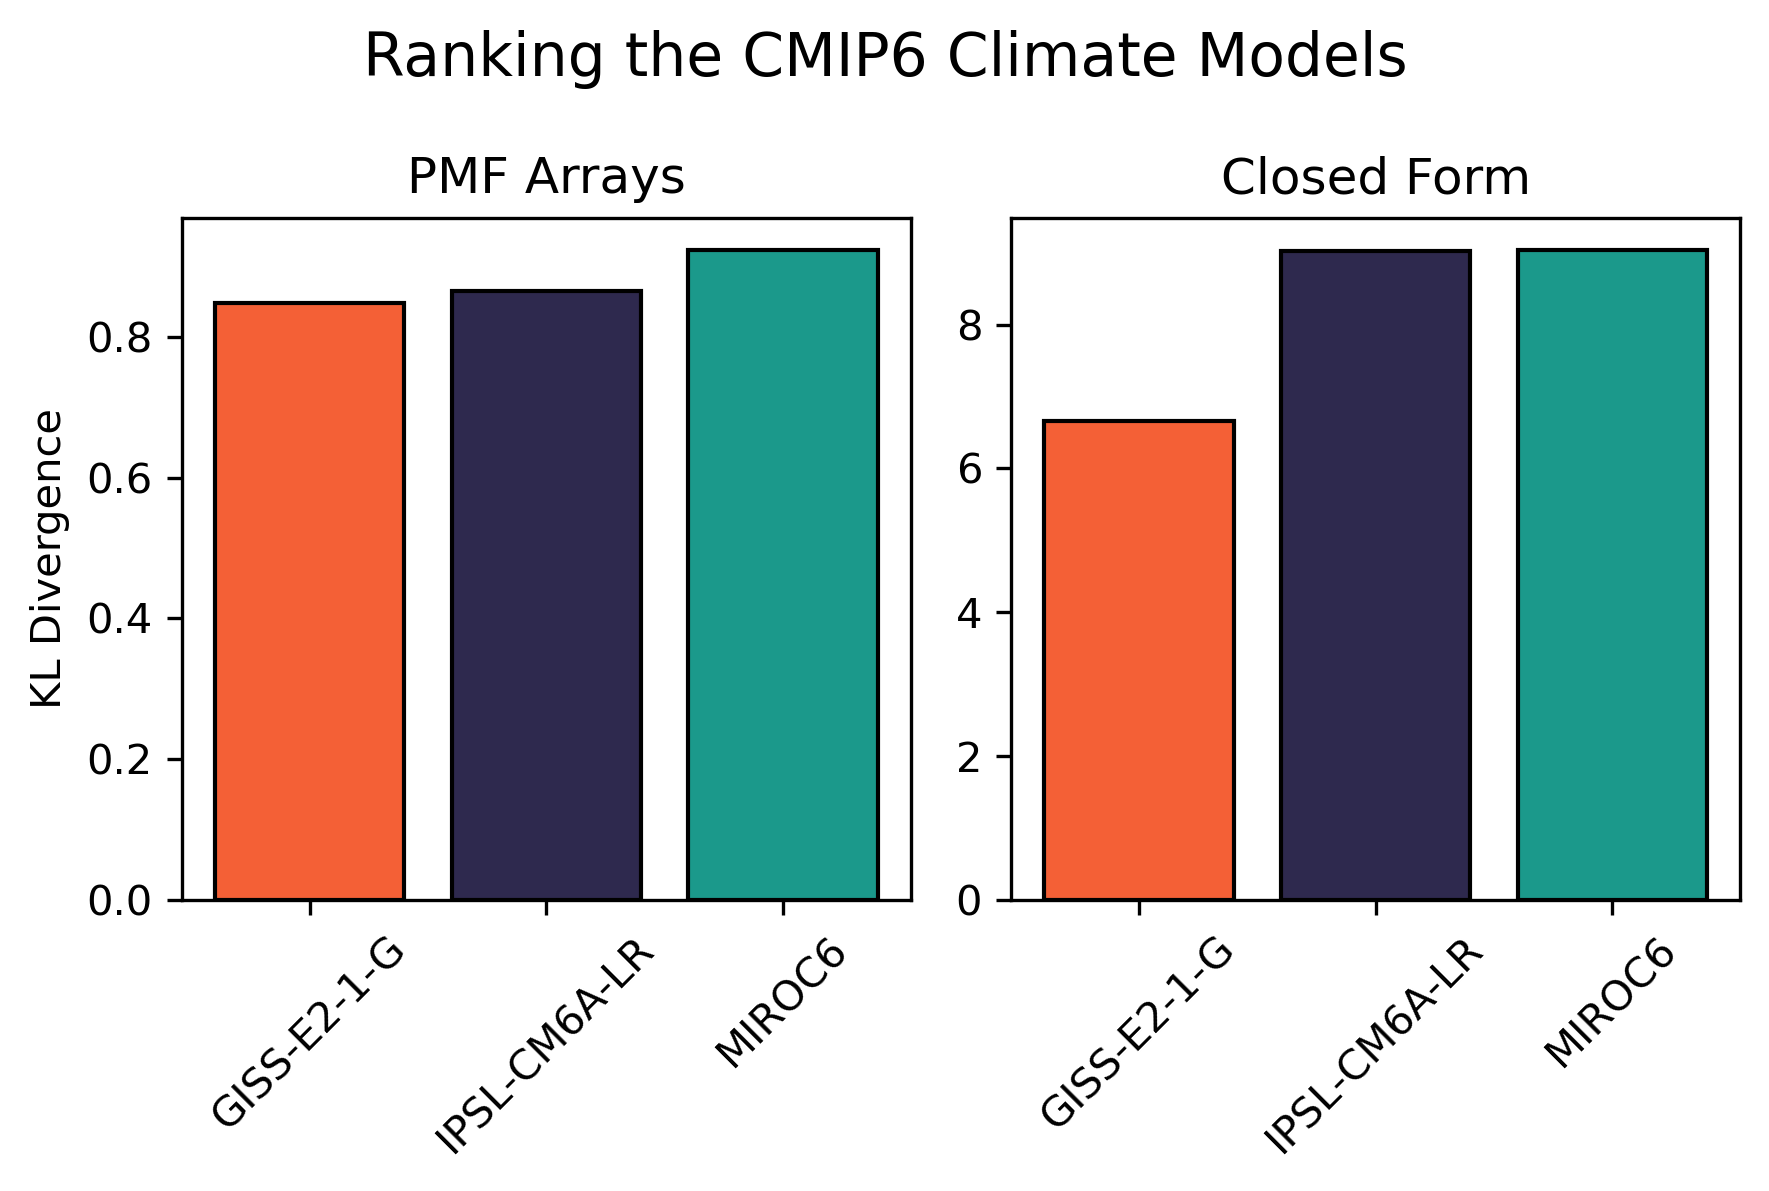

In [2]:
# Set the scores
KL_scores = [0.848,0.865,0.923]
KL_closed_scores = [6.665,9.027,9.031]

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300)
ax[0].bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], KL_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax[0].set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)
ax[0].title.set_text('PMF Arrays')


ax[1].bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], KL_closed_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax[1].set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)
ax[1].title.set_text('Closed Form')

ax[0].set_ylabel('KL Divergence')


plt.suptitle("Ranking the CMIP6 Climate Models", fontsize='x-large')

plt.tight_layout()

plt.savefig('model_ranking_kl_divergences.eps', format='eps', facecolor='None', dpi=300, transparency=True)

## Comparing Wasserstein Distances 

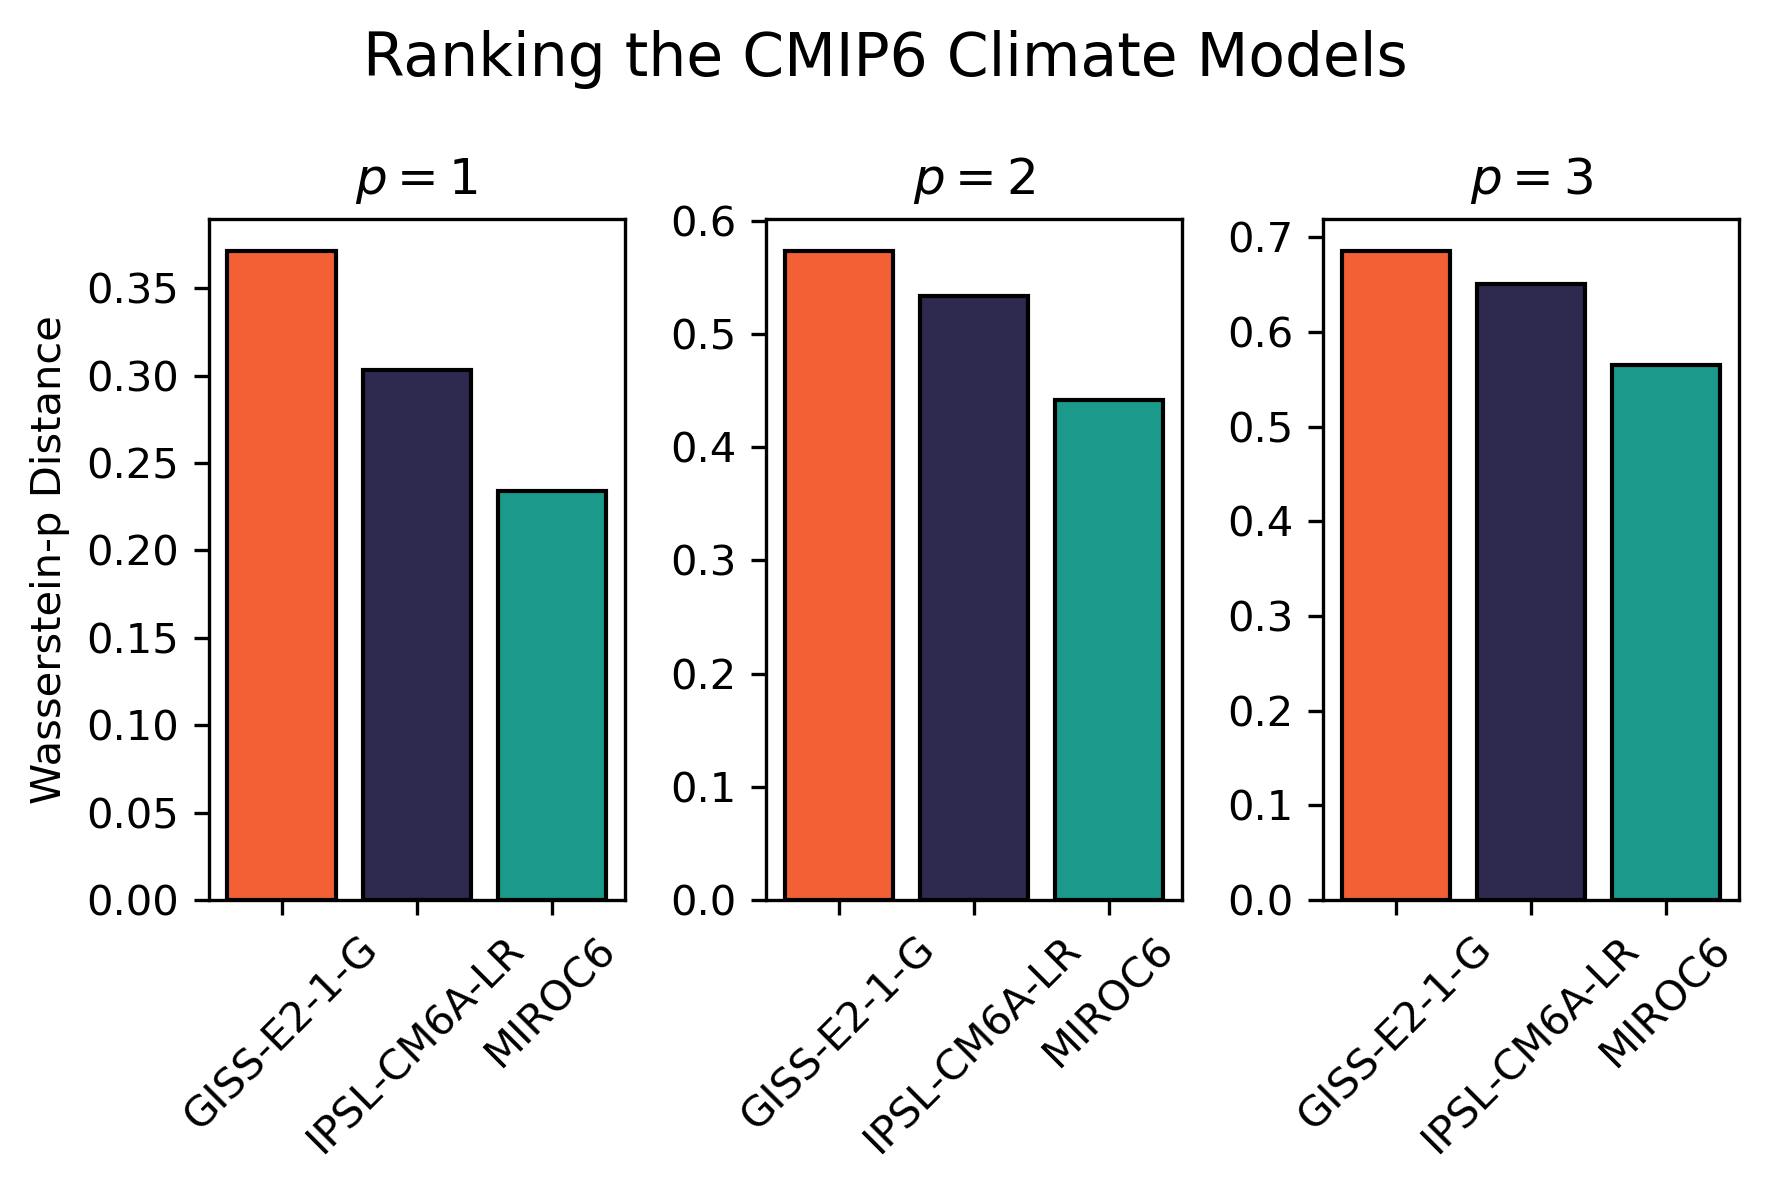

In [2]:
# Set the scores
W1_scores = [0.371, 0.303, 0.234]
W2_scores = [0.573, 0.534, 0.442]
W3_scores = [0.685, 0.651, 0.565]

fig, ax = plt.subplots(nrows=1, ncols=3, dpi=300)
ax[0].bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], W1_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax[0].set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)
ax[0].title.set_text('$p=1$')


ax[1].bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], W2_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax[1].set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)
ax[1].title.set_text('$p=2$')

ax[2].bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], W3_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax[2].set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)
ax[2].title.set_text('$p=3$')

ax[0].set_ylabel('Wasserstein-p Distance')


plt.suptitle("Ranking the CMIP6 Climate Models", fontsize='x-large')

plt.tight_layout()

plt.savefig('model_ranking_wasserstein_distances.eps', format='eps', facecolor='None', dpi=300, transparency=True)

## Energy Distance

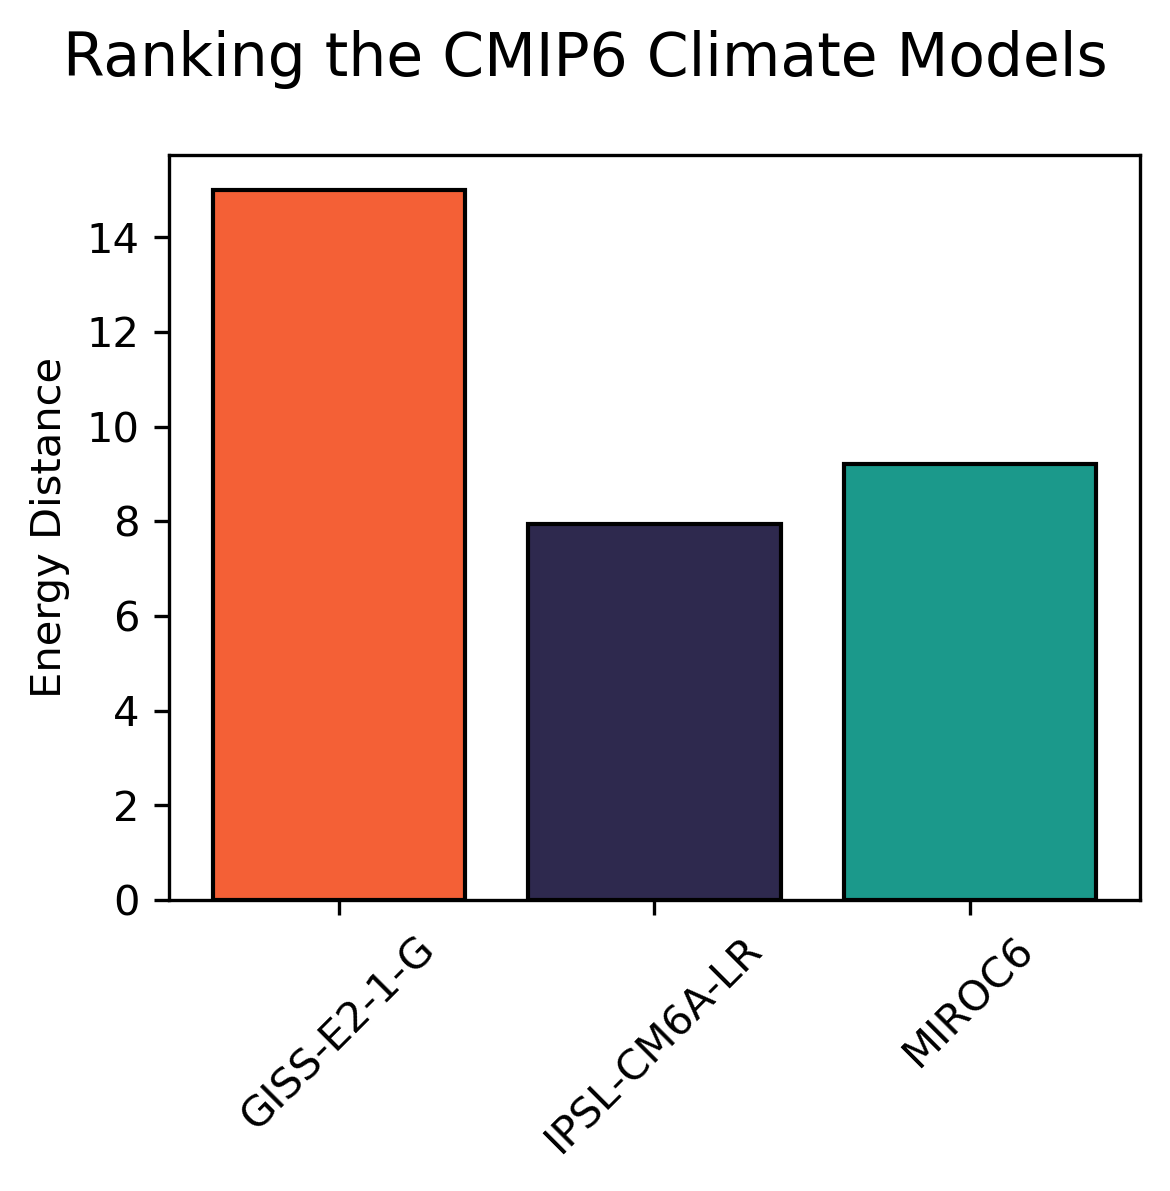

In [4]:
# Set the scores
E_scores = [14.987, 7.944, 9.201]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=300)
ax.bar(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], E_scores, color=['#f46036','#2e294e','#1b998b'], edgecolor='black')
ax.set_xticklabels(['GISS-E2-1-G', 'IPSL-CM6A-LR', 'MIROC6'], rotation=45)

ax.set_ylabel('Energy Distance')


plt.suptitle("Ranking the CMIP6 Climate Models", fontsize='x-large')

plt.tight_layout()

plt.savefig('model_ranking_energy.eps', format='eps', facecolor='None', dpi=300, transparency=True)

# Scores in 3D Space (OLD)

## Visualisation

We present these 3D scores on axes:

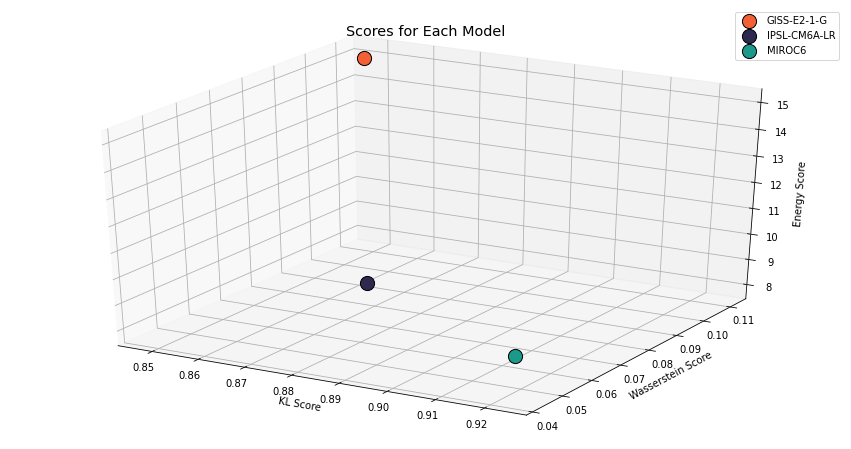

In [5]:
fig = plt.figure(figsize=(15,8))

#Make 3D projection
ax = plt.axes(projection='3d')
ax.scatter3D(KL_scores[0], W_scores[0], E_scores[0], s=200, c='#f46036', edgecolor='black', label='GISS-E2-1-G')
ax.scatter3D(KL_scores[1], W_scores[1], E_scores[1], s=200, c='#2e294e', edgecolor='black', label='IPSL-CM6A-LR')
ax.scatter3D(KL_scores[2], W_scores[2], E_scores[2], s=200, c='#1b998b', edgecolor='black', label='MIROC6')

ax.set_xlabel('KL Score')
ax.set_ylabel('Wasserstein Score')
ax.set_zlabel('Energy Score')

ax.set_title('Scores for Each Model', fontsize='x-large')

ax.legend()

plt.legend()
fig.savefig('Model_scores_3D_white', facecolor='None',bbox_inches='tight', dpi=300, transparency=True)

## Test Rank with Euclidean Norm:

 Calculate the norms of these 3D scores:

In [6]:
GISS_norm = np.linalg.norm([KL_scores[0], W_scores[0], E_scores[0]])
IPSL_norm = np.linalg.norm([KL_scores[1], W_scores[1], E_scores[1]])
MIROC_norm = np.linalg.norm([KL_scores[2], W_scores[2], E_scores[2]])

In [7]:
GISS_norm

15.011382148223394

In [8]:
IPSL_norm

7.991407010032714

In [9]:
MIROC_norm

9.247279545898891

### Creating a weights vector:

In [50]:
model_weights = [1/GISS_norm, 1/IPSL_norm, 1/MIROC_norm]/np.sum([1/GISS_norm, 1/IPSL_norm, 1/MIROC_norm])

In [51]:
model_weights

array([0.22213485, 0.41726709, 0.36059807])

## Evaluating Ranks Across Norms:

### p-Norms

We perform the following algorithm:
- For each $1 \leq p \leq 10$, calculate the $p$-norm of each model score vector
- Calculate the associated rank $R$
- Store the value of $p$ and $R$ in an array

In [48]:
#Values for p to take in increments of 1
p_values = np.linspace(1, 10, 10)

#Create function to do all of this:
def norm_rank_array(p_values):
    
    #Empty array to store the norms and associated rank
    norm_rank = np.zeros(shape=(len(p_values), 4)) #shape=(number of p values, 3 ranks and p)
    
    #Index counter
    i = 0
    
    for p in p_values:
        #Calculate the p norm of each vector:
        GISS_norm = (np.sum([KL_scores[0]**p, W_scores[0]**p, E_scores[0]**p]))**(1/p)
        IPSL_norm = (np.sum([KL_scores[1]**p, W_scores[1]**p, E_scores[1]**p]))**(1/p)
        MIROC_norm = (np.sum([KL_scores[2]**p, W_scores[2]**p, E_scores[2]**p]))**(1/p)
    
        #Rank the values
        ranks = scipy.stats.rankdata([GISS_norm, IPSL_norm, MIROC_norm])
    
        #Store the values in the array
        norm_rank[i,:] = [ranks[0], ranks[1], ranks[2], p]
        
        #Add 1 to the index
        i += 1
        
    #Return the array
    return norm_rank

In [49]:
norm_rank = norm_rank_array(p_values)

In [51]:
norm_rank

array([[ 3.,  1.,  2.,  1.],
       [ 3.,  1.,  2.,  2.],
       [ 3.,  1.,  2.,  3.],
       [ 3.,  1.,  2.,  4.],
       [ 3.,  1.,  2.,  5.],
       [ 3.,  1.,  2.,  6.],
       [ 3.,  1.,  2.,  7.],
       [ 3.,  1.,  2.,  8.],
       [ 3.,  1.,  2.,  9.],
       [ 3.,  1.,  2., 10.]])

We see that no matter which p-norm we take, we have no change in rank.

## Kendall's Tau Rank Correlation Coefficient

We look at the rank vectors directly from the 3 methods and use the non-parametric correlation coefficient to assess them.

KL vs Wasserstein:

In [19]:
scipy.stats.kendalltau(KL_ranks, W_ranks)

KendalltauResult(correlation=-1.0, pvalue=0.3333333333333333)

KL vs Energy:

In [20]:
scipy.stats.kendalltau(KL_ranks, E_ranks)

KendalltauResult(correlation=-0.33333333333333337, pvalue=1.0)

Wasserstein vs Energy:

In [21]:
scipy.stats.kendalltau(W_ranks, E_ranks)

KendalltauResult(correlation=0.33333333333333337, pvalue=1.0)

## Fitting a Ranking by Maximising Kendall Correlation

Here we seek to answer the following optimisation problem:
$$ \text{argmax}_{R \in \text{ranks}} \sum_{i=0}^{3} \tau(R_i - R)$$
where $\tau$ is the Kendall Tau correlation coefficient, a non-parametric test statistic.

In [87]:
def compute_total_tau(p):
    result = 0.0
    result += scipy.stats.kendalltau(p, KL_ranks).correlation
    result += scipy.stats.kendalltau(p, W_ranks).correlation
    result += scipy.stats.kendalltau(p, E_ranks).correlation
    return result / 3.0

In [88]:
all_ranks = list(set(permutations([ 1, 2, 3])))

In [89]:
taus = np.array([compute_total_tau(p) for p in all_ranks])

In [90]:
taus

array([-0.33333333, -0.11111111,  0.11111111,  0.11111111,  0.33333333,
       -0.11111111])

In [91]:
fitted_ranks_tau = all_ranks[np.argmax(taus)]

In [92]:
fitted_ranks_tau

(3, 1, 2)

# Rank Eval

We want to enhance our rank comparison methods by using a specialised package for ranking metrics: $\texttt{rank eval}$. This gives us access to three different non-parametric rank metrics:
- Kendall Tau (already tried and tested)
- NDCG (Normalised Discounted Cumulative Gain)
- ERR (Expected Reciprocal Rank)

In [13]:
import sys
rank_eval_dir = 'C:/Users/rptb2/.conda/pkgs/rankeval-master/src/'
sys.path.append(rank_eval_dir)

In [34]:
from sentence.ranking import Ranking

In [36]:
from evaluation.ranking.segment import kendall_tau
from evaluation.ranking.segment import reciprocal_rank
from evaluation.ranking.segment import ndgc_err

## Rank the Three Models

In [68]:
KL_re = Ranking(KL_ranks)
W_re = Ranking(W_ranks)
E_re = Ranking(E_ranks)

### Brief Testing

In [62]:
kendall_tau(KL_re, W_re)

Result(tau=-1.0, prob=0.11718509694604401, concordant_count=0, discordant_count=3, all_pairs_count=3, original_ties=0, predicted_ties=0, pairs=3)

In [63]:
kendall_tau(KL_re, E_re)

Result(tau=-0.3333333333333333, prob=0.6015081441136939, concordant_count=1, discordant_count=2, all_pairs_count=3, original_ties=0, predicted_ties=0, pairs=3)

This coincides with scipy.stats.kendalltau, but also gives us more information.

The following calculates both NDCG and ERR in one hit, by:
- Input = (predicted rank vector, true rank vector)
- Output = (NDCG, ERR)

In [66]:
ndgc_err(KL_re, W_re)

(0.6806060567602009, 0.44856770833333337)

In [67]:
ndgc_err(KL_re, E_re)

(0.7363636171343383, 0.521484375)

It seems from intuition that we want to <b>maximise</b> these for the best estimate rank.

## Fitting a Ranking by Maximising NDCG

Here we seek to answer the following optimisation problem:
$$ \text{argmax}_{R \in \text{ranks}} \frac{1}{3} \sum_{i=0}^{3} \text{NDCG}(R_i,R)$$

In [77]:
def compute_total_ndcg(p):
    result = 0.0
    result += ndgc_err(KL_re, p)[0]
    result += ndgc_err(W_re, p)[0]
    result += ndgc_err(E_re, p)[0]
    return result / 3.0

In [78]:
all_ranks = list(set(permutations([1, 2, 3])))

In [79]:
for i in range(len(all_ranks)):
    all_ranks[i] = Ranking(all_ranks[i])

In [80]:
total_ndcgs = np.array([compute_total_ndcg(p) for p in all_ranks])

In [81]:
fitted_ranks_ndcg = all_ranks[np.argmax(total_ndcgs)]

In [82]:
fitted_ranks_ndcg

[3.0, 1.0, 2.0]

## Fitting a Ranking by Maximising ERR

Here we seek to answer the following optimisation problem:
$$ \text{argmax}_{R \in \text{ranks}} \frac{1}{3} \sum_{i=0}^{3} \text{ERR}(R_i - R)$$

In [83]:
def compute_total_err(p):
    result = 0.0
    result += ndgc_err(KL_re, p)[1]
    result += ndgc_err(W_re, p)[1]
    result += ndgc_err(E_re, p)[1]
    return result / 3.0

In [84]:
total_errs = np.array([compute_total_err(p) for p in all_ranks])

In [85]:
fitted_ranks_err = all_ranks[np.argmax(total_errs)]

In [86]:
fitted_ranks_err

[3.0, 1.0, 2.0]

# Obtain Non-Parametric Weights

From using all of the methods above, we're certain that the optimal ranking is $(3,1,2)$. Now, we can build weights off of these ranks.

We get weights via a discrete logit model:
$$ w_i = \frac{e^{3-r_i}}{\sum_j e^{3-r_j}} $$

In [8]:
optimal_ranks = np.array([3,1,2])

In [9]:
model_reciprocal_weights = (1/optimal_ranks)/np.sum(1/optimal_ranks)

In [10]:
model_logit_weights = np.exp(3 * np.ones(3) - optimal_ranks) / np.sum(
    np.exp(3 * np.ones(3) - optimal_ranks))

In [11]:
print('GISS model reciprocal weight:', model_reciprocal_weights[0])
print('IPSL model reciprocal weight:', model_reciprocal_weights[1])
print('MIROC model reciprocal weight:', model_reciprocal_weights[2])

GISS model reciprocal weight: 0.18181818181818182
IPSL model reciprocal weight: 0.5454545454545455
MIROC model reciprocal weight: 0.27272727272727276


In [12]:
print('GISS model logit weight:', model_logit_weights[0])
print('IPSL model logit weight:', model_logit_weights[1])
print('MIROC model logit weight:', model_logit_weights[2])

GISS model logit weight: 0.09003057317038046
IPSL model logit weight: 0.6652409557748219
MIROC model logit weight: 0.24472847105479764


We can see the logit weights prioritise the lower ranking models more than the reciprocal weights do.